In [1]:
import pandas as pd
df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
    header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# PipeLine

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20, random_state=1)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([("e", PCA(n_components=2)),
              ("3", StandardScaler()),
              ("w", LogisticRegression(random_state=1))])
#pipeline parameter:
#pipln = Pipeline([("trsfm1",transformer_1),
#                  ("trsfm2",transformer_2),
#                  ("estmtr",estimator)])
pipe_lr.fit(X_train, y_train)
pipe_lr.score(X_test, y_test)

0.89473684210526316

# Using k-fold cross-validation to assess model performance

In [31]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10,
                            random_state=1).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold: 1, Class dist.: [256 153], Acc: 0.935
Fold: 2, Class dist.: [256 153], Acc: 0.870
Fold: 3, Class dist.: [256 153], Acc: 0.891
Fold: 4, Class dist.: [256 153], Acc: 0.913
Fold: 5, Class dist.: [256 153], Acc: 0.935
Fold: 6, Class dist.: [257 153], Acc: 0.911
Fold: 7, Class dist.: [257 153], Acc: 0.933
Fold: 8, Class dist.: [257 153], Acc: 0.978
Fold: 9, Class dist.: [257 153], Acc: 0.956
Fold: 10, Class dist.: [257 153], Acc: 0.911

CV accuracy: 0.923 +/- 0.029


In [33]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator=pp,
                    X=X_train,
                    y=y_train,
                    cv=10,
                    n_jobs=-1)
scores
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.923 +/- 0.029


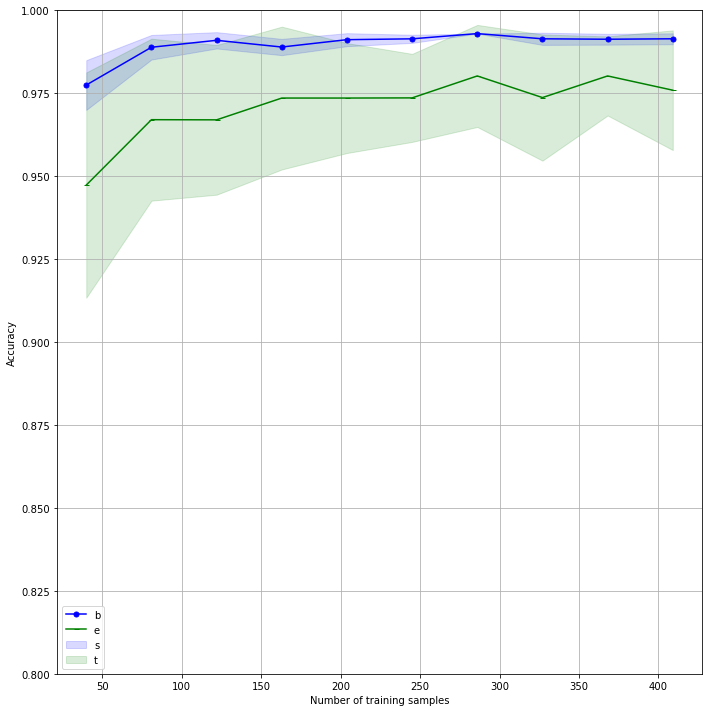

In [44]:
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve
%matplotlib inline
pipe_lr = Pipeline([
        ("scl", StandardScaler()),
        ("clf", LogisticRegression(penalty='l2',
                                  random_state=0))
    ])
train_sizes, train_scores, test_scores =\
    learning_curve(estimator=pipe_lr,
                  X=X_train, y = y_train,
                  train_sizes=np.linspace(0.1, 1.0, 10),
                  cv=10,
                  n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.figure(figsize=(10,10))
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5,
         label='training accuracy')
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color="blue")
plt.plot(train_sizes, test_mean,
         color='green', marker='_',
         markersize=5,
         label='training accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color="green")
plt.grid()
plt.xlabel("Number of training samples")
plt.ylabel("Accuracy")
plt.legend("best")
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()

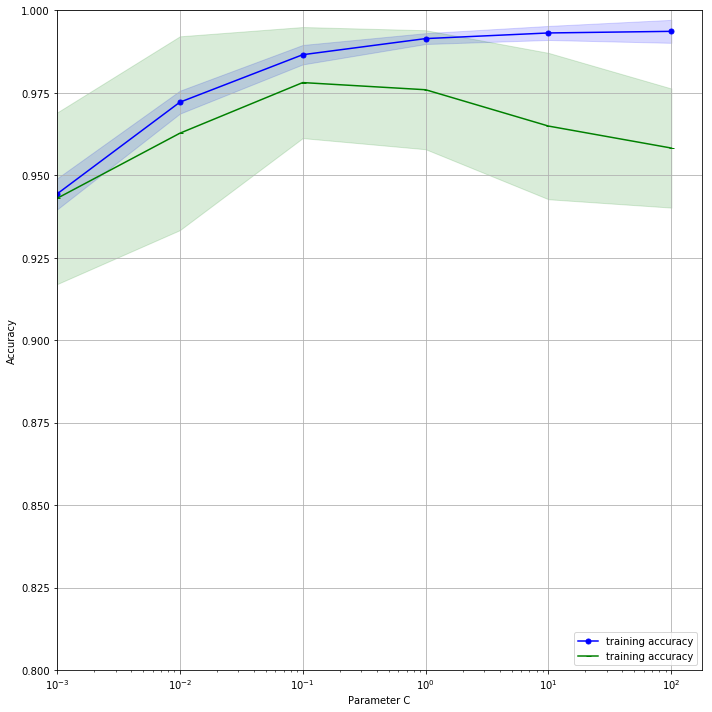

In [51]:
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=pipe_lr,
                                            X=X_train,
                                            y=y_train,
                                            param_name="clf__C",
                                            param_range=param_range,
                                            cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.figure(figsize=(10,10))
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5,
         label='training accuracy')
plt.fill_between(param_range,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color="blue")
plt.plot(param_range, test_mean,
         color='green', marker='_',
         markersize=5,
         label='training accuracy')
plt.fill_between(param_range,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color="green")
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()

# Fine-tuning machine learning models via grid search

In [55]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
pipe_svc = Pipeline([("scl", StandardScaler()),
                    ("clf", SVC(random_state=1))])
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
param_grid = [{"clf__C": param_range,
             "clf__kernel": ["linear"]},
            {"clf__C": param_range,
            "clf__gamma": param_range,
            "clf__kernel": ["rbf"]}]
gs = GridSearchCV(estimator=pipe_svc,
                 param_grid=param_grid,
                 scoring="accuracy",
                 cv=10,
                 n_jobs=1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.978021978022
{'clf__C': 0.1, 'clf__kernel': 'linear'}


In [56]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.96491228070175439

### Algorithm selection with nested cross-validation

In [59]:
gs = GridSearchCV(estimator=pipe_svc,
                 param_grid=param_grid,
                 scoring="accuracy",
                 cv=10, n_jobs=1)
score = cross_val_score(gs, X, y, scoring="accuracy", cv=5)
score

array([ 0.95652174,  0.97391304,  0.96460177,  0.96460177,  0.99115044])

# Looking at different performance evaluation metrics

In [61]:
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
cofmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
cofmat

array([[71,  1],
       [ 2, 40]])

In [62]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Precision: 0.976
Recall: 0.952
F1: 0.964


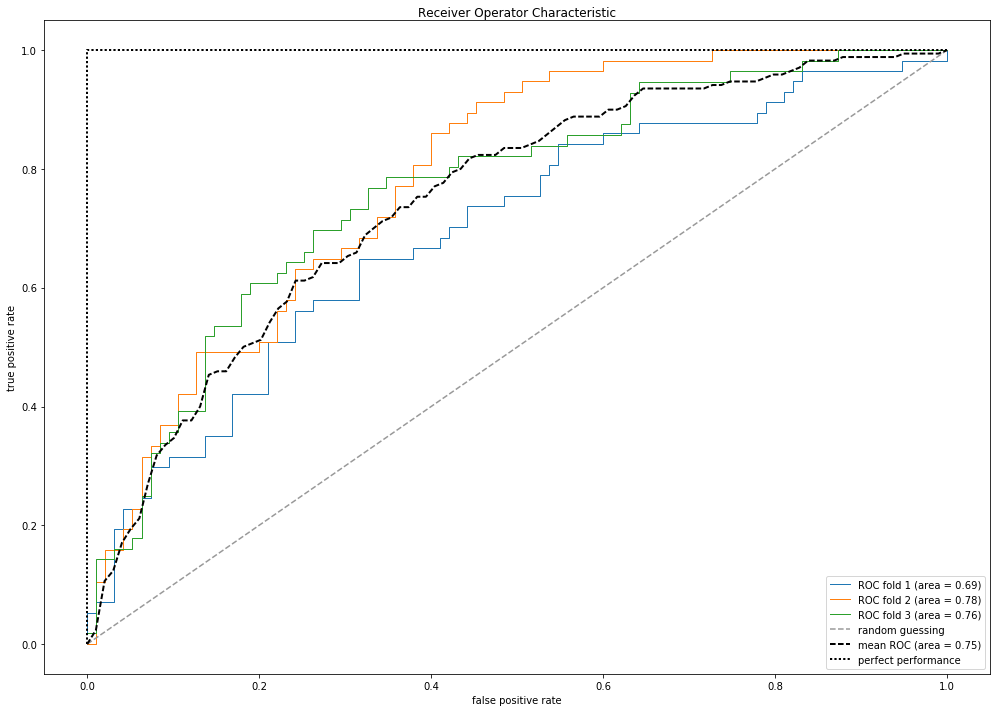

In [73]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
X_train2 = X_train[:, [4,14]]
cv = list(StratifiedKFold(n_splits=3, 
          random_state=1).split(X_train, y_train))
fig = plt.figure(figsize=(14,10))
mean_tpr = 0
mean_fpr = np.linspace(0, 1, 100)
all_ptr = []
for i, (train, test) in enumerate(cv):
    pipe_lr.fit(X_train2[train], y_train[train])
    probas = pipe_lr.predict_proba(X_train2[test])
    fpr, tpr, thresholds = roc_curve(y_train[test], 
                                    probas[:, 1],
                                    pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             lw=1,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         lw=2,
         linestyle=':',
         color='black',
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('./figures/roc.png', dpi=300)
plt.show()

In [74]:
pipe_svc = pipe_svc.fit(X_train2, y_train)
y_pred2 = pipe_svc.predict(X_test[:, [4,14]])
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
print('ROC AUC: %.3f' % roc_auc_score(y_true=y_test,
                                      y_score=y_pred2))
print('Accuracy: %.3f' % accuracy_score(
        y_true=y_test, y_pred=y_pred2))

ROC AUC: 0.671
Accuracy: 0.728
